In [ ]:
# load the autoreload extension for IPython
# This allows you to automatically reload modules before executing code
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))

# EDA for AMZN Historical Data

In [3]:
from scripts.financial_analysis import FinancialDataAnalyzer
from scripts.utils import load_financial_data

In [4]:
#load data
stock_prefix = 'AMZN'
stock_data = load_financial_data(stock_prefix)

# show the first 5 rows of the stock data
stock_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [5]:
# Display the shape of the DataFrame and check for missing values
print(f"Data shape: {stock_data.shape}")

# Check for missing values in the DataFrame
print("Missing values:")
print(stock_data.isnull().sum())

Data shape: (6846, 9)
Missing values:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [6]:
analyzer = FinancialDataAnalyzer(stock_data, stock_prefix)
analyzer.change_to_datetime()

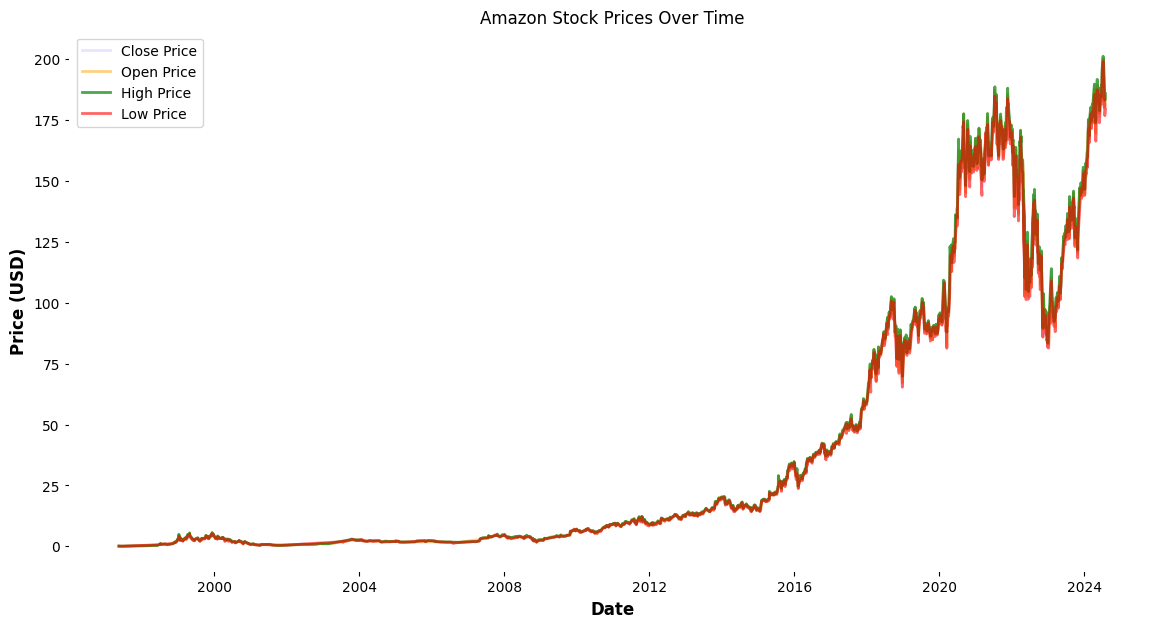

d:\active_repos\10_academy\Week-1-predicting-price-moves\.venv\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


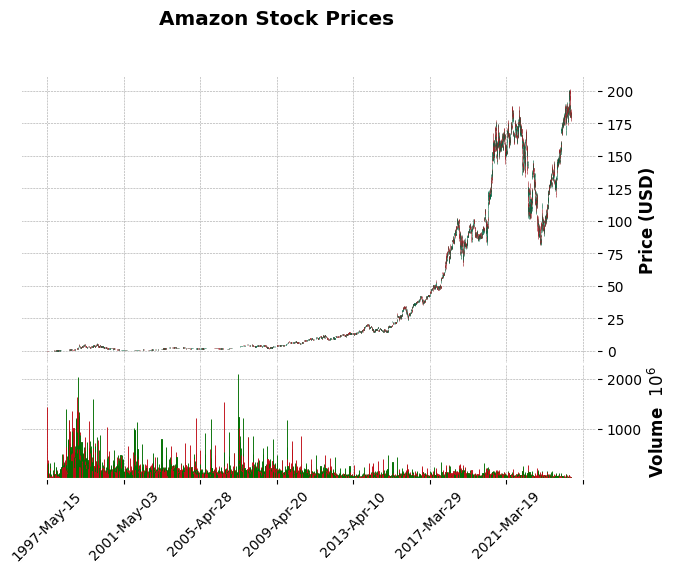

In [7]:
# Visualize the stock price over time
analyzer.plot_stock_prices()

In [8]:
# Analyze stock price trends
analyzer.analyze_stock_price_trends()


Stock Price Trend Analysis for Amazon:
Trend
Up           3482
Down         3325
No Change      39
Name: count, dtype: int64


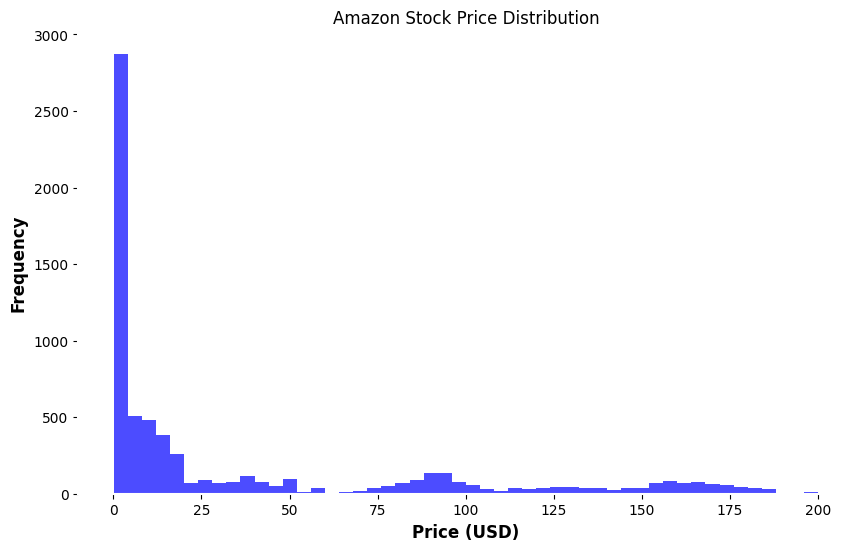

In [9]:
# Visualize the distribution of stock prices
analyzer.visualize_stock_price_distribution()

# Technical Analysis Indicators with TA-Lib
This section demonstrates how to calculate and analyze common technical indicators such as Moving Averages, RSI, and MACD using TA-Lib on AMZN historical data.

In [11]:
# Calculate technical indicators
analyzer.calculate_technical_indicators()


# Visualize Technical Indicators
Visualize the stock price along with SMA, RSI, and MACD to better understand their impact on AMZN price trends.

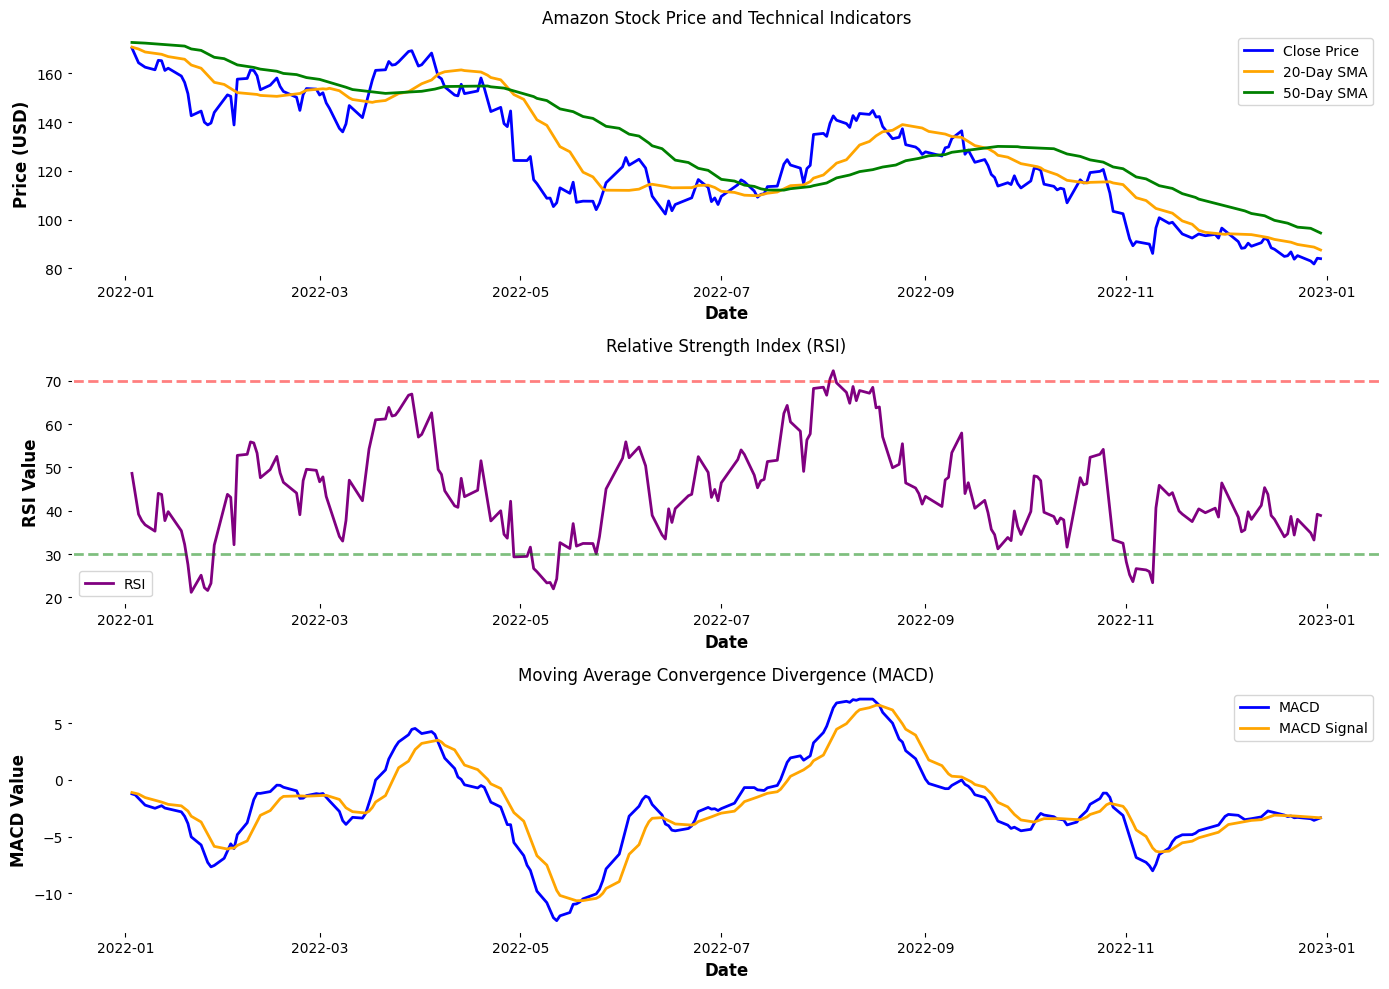

In [12]:
# Plot technical indicators
analyzer.plot_technical_indicators(start_date='2022-01-01', end_date='2022-12-31')